<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/coherence/ComputationalImagingHomework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

### Homework 


Homework 6 deals with resolution in optical systems. Consider an imaging system with 3D coherent impulse response equal to the fundamenatal Gaussian mode. 
$$
h(x,y,z)=\frac{1}{w_o^2+i\lambda z}e^{2\phi i\frac{z}{\lambda}}e^{-\pi\frac{x^2+y^2}{w_o^2+i\lambda z}}
$$
For this homework, please model incoherent imaging of 3D objects using this impulse response. Using Weiner filtering, Richardson-Lucy deconvolution, total variation deconvolution and neural processing, estimate the spatial resolution in cross range (xy) and range (z) that one can achieve for well focused images using this impulse response for point targets and natural images assuming 1000, 10000 and 100000 photons per pixel of peak signal power. 


## Libraries

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io
from google.colab import files
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

## gaussian point spread function

In [ ]:
def g(rho,z, wo):
  # all spatial terms are in units of wavelengths
  g=(1/(wo**2+1j*z))*np.exp(2*np.pi*1j*z)*np.exp(-np.pi*rho**2/(wo**2+1j*z))
  return g


The plots below show a 2 wavelength Gaussian focal spot diffracting from focus to 100 wavelengths

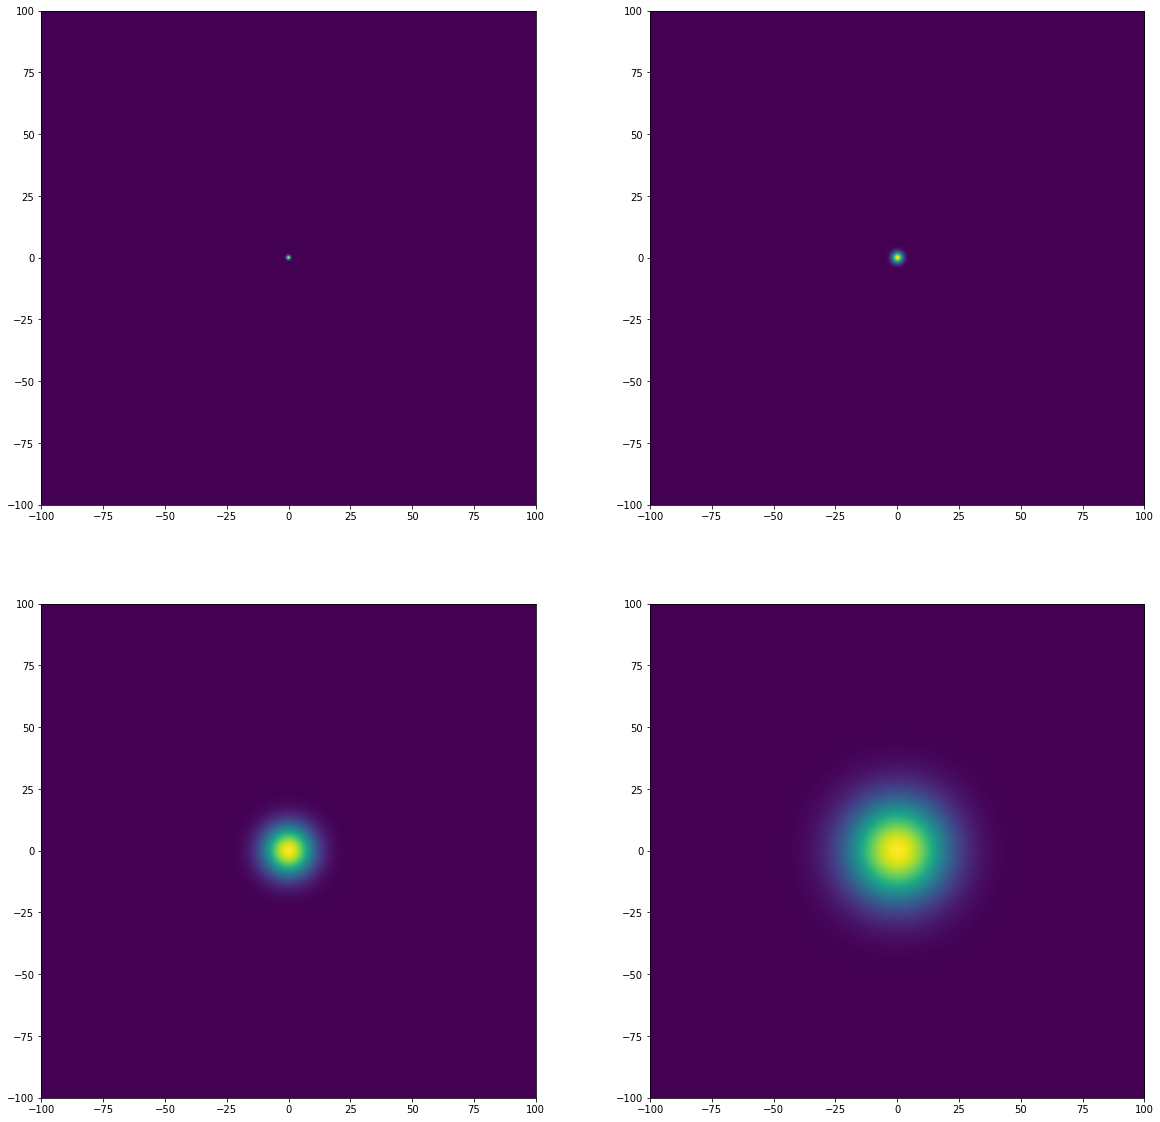

In [ ]:
x=np.linspace(-100,100,1024)
xx,yy= np.meshgrid(x,x)
plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(np.abs(g(np.sqrt(xx**2+yy**2), 0, 2))**2,extent=[-100,100,-100,100])
plt.subplot(2,2,2)
plt.imshow(np.abs(g(np.sqrt(xx**2+yy**2), 10, 2))**2,extent=[-100,100,-100,100])
plt.subplot(2,2,3)
plt.imshow(np.abs(g(np.sqrt(xx**2+yy**2), 50, 2))**2,extent=[-100,100,-100,100])
plt.subplot(2,2,4)
plt.imshow(np.abs(g(np.sqrt(xx**2+yy**2), 100, 2))**2,extent=[-100,100,-100,100])

The plot below is a cross section of the Gaussian focal spot in the  x-z plane

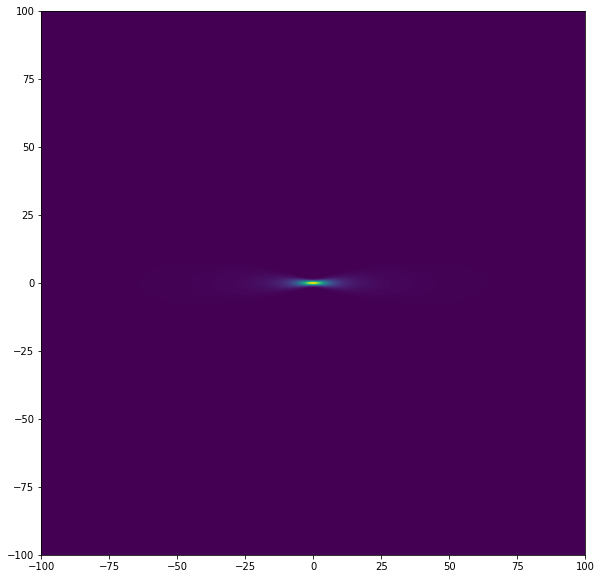

In [ ]:
x=np.linspace(-100,100,1024)
z=np.linspace(-100,100,256)
plt.figure(figsize=[10,10])
zz, xx= np.meshgrid(z,x)
plt.imshow(np.abs(g(np.sqrt(xx**2),zz, 2))**2,extent=[-100,100,-100,100])
